In [1]:
#Loading the Python package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import ttest_ind
from sklearn.ensemble import VotingRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from scipy.stats import norm
from scipy.stats import ttest_ind
import joblib

## Loading the data

In [2]:
splitting_seed=42
np.random.seed(splitting_seed)
top_age=75# chaning this metric changes the upper bound of the target region


#######
#Replace with proper addresses of sampled data. Data used here was seperated by E4-carriers and E4-NCS
#######
E4_AD_data_fp="C:/Users/woods/OneDrive/Documents/Research/Brain Lab/brain age paper/Sampled Data/both_apoe4_ad.csv"
NC_AD_data_fp="C:/Users/woods/OneDrive/Documents/Research/Brain Lab/brain age paper/Sampled Data/both_nonapoe4_ad.csv"
CU_data_fp="C:/Users/woods/OneDrive/Documents/Research/Brain Lab/brain age paper/Sampled Data/sampled_cn2.csv"

apoe4_ad=pd.read_csv(E4_AD_data_fp).fillna(0)
apoe4_ad['label']=pd.DataFrame(np.ones((apoe4_ad.shape[0])))
apoe4_ad['APOE4']=1 #adds genotype information

nonapoe4_ad=pd.read_csv(NC_AD_data_fp).fillna(0)
nonapoe4_ad['label']=pd.DataFrame(np.zeros((nonapoe4_ad.shape[0])))
nonapoe4_ad['APOE4']=0 #adds genotype information

sampled_cn=pd.read_csv(CU_data_fp)#already gentically labeled
#sort by genetic labels
apoe4_cn=sampled_cn[sampled_cn['APOE4']==1]
nonapoe4_cn=data_cn=sampled_cn[sampled_cn['APOE4']==0] 


features = [ "CBTIA_1.0", "DEP2YRS_1.0", "DIABETES_1.0", "SOMATIC_1.0", "NACCBMI","INCONTU_1.0","EDUC",
          "B12DEF_2.0", "BPDIAS", "BPSYS", "HRATE", "SMOKYRS", "VISWCORR_1.0", "B12DEF_1.0", "NACCBETA_1.0", 
         "NACCLIPL_1.0", "NACCDBMD_1.0", "SEX",'APOE4']

brain = ["NACCAGE", "CEREALL", "CERECSF", "CEREGR", "CERETISS", "CEREWH", "CSFVOL", "FRCORT", "GRAYVOL", "HIPPOVOL", "LATVENT",
        "LCAC", "LCACM", "LCMF", "LCMFM", "LCUN", "LCUNM", "LENT", "LENTM", "LFRCORT", "LFUS", "LFUSM", "LHIPPO", "LINFPAR",
        "LINFPARM", "LINFTEMM", "LINFTEMP", "LINSULA","LINSULAM","LISTHC","LISTHCM","LLATOCC","LLATOCCM","LLATORBF",
        "LLATORBM","LLATVENT","LLING","LLINGM","LMEDORBF","LMEDORBM","LMIDTEMM","LMIDTEMP", "LOCCORT","LPARCEN","LPARCENM",
        "LPARCORT", "LPARHIP", "LPARHIPM", "LPARORB", "LPARORBM", "LPARSOP", "LPARSOPM", "LPARTRI", "LPARTRIM", "LPERCAL",
        "LPERCALM", "LPOSCEN", "LPOSCENM", "LPOSCIN", "LPOSCINM", "LPRECEN", "LPRECENM", "LPRECUN", "LPRECUNM", "LROSANC",
        "LROSANCM", "LROSMF", "LROSMFM", "LSUPFR", "LSUPFRM", "LSUPMAR", "LSUPMARM", "LSUPPAR", "LSUPPARM", "LSUPTEM", "LSUPTEMM",
        "LTEMPCOR", "LTRTEM", "LTRTEMM", "NACCBRNV", "NACCICV", "NACCWMVL", "OCCCORT", "PARCORT", "RCAC", "RCACM",
        "RCMF", "RCMFM", "RCUN", "RCUNM", "RENT", "RENTM", "RFRCORT", "RFUS", "RFUSM", "RHIPPO", "RINFPAR", "RINFPARM",
        "RINFTEMM", "RINFTEMP", "RINSULA", "RINSULAM", "RISTHC", "RISTHCM", "RLATOCC", "RLATOCCM", "RLATORBF", "RLATORBM",
        "RLATVENT", "RLING", "RLINGM", "RMEDORBF", "RMEDORBM", "RMIDTEMM", "RMIDTEMP", "ROCCORT", "RPARCEN", "RPARCENM",
        "RPARCORT", "RPARHIP", "RPARHIPM", "RPARORB", "RPARORBM", "RPARSOP", "RPARSOPM", "RPARTRI", "RPARTRIM", "RPERCAL",
        "RPERCALM", "RPOSCEN", "RPOSCENM", "RPOSCIN", "RPOSCINM", "RPRECEN", "RPRECENM", "RPRECUN", "RPRECUNM", "RROSANC",
        "RROSANCM", "RROSMF", "RROSMFM", "RSUPFR", "RSUPFRM", "RSUPMAR", "RSUPMARM", "RSUPPAR", "RSUPPARM", "RSUPTEM", 
        "RSUPTEMM", "RTEMPCOR", "RTRTEM", "RTRTEMM", "TEMPCOR", "THIRVENT", "WHITEVOL", "WMHVOL"]

all_features=brain+features


#Match data to designated set of features for CU dataset
data_cn_E4 = apoe4_cn[all_features]
data_cn_NC = nonapoe4_cn[all_features]
cn_data = pd.concat([data_cn_E4, data_cn_NC])
y_cn=data_cn.NACCAGE

#Match data to designated set of features for AD dataset
data_ad_E4 = apoe4_ad[all_features]
data_ad_NC = nonapoe4_ad[all_features]
ad_data = pd.concat([data_ad_E4, data_ad_NC])
y_ad=ad_data.NACCAGE


#######Define CU Target Vairabels###########
y_cn=cn_data.NACCAGE#Age
x_cn=cn_data.drop(["NACCAGE"], axis=1)
############################################

#######Define AD Target Vairabels###########
data_ad_E4=ad_data[ad_data.NACCAGE<top_age]#Limits age to target region
y_ad=data_ad_E4.NACCAGE
X_ad=data_ad_E4.drop(["NACCAGE"], axis=1)
############################################


#Define empty lists to store data
SHAPs_XG_cn=[]
SHAPs_LR_cn=[]
SHAPs_RF_cn=[]
SHAPs_XG_ad=[]
SHAPs_LR_ad=[]
SHAPs_RF_ad=[]

ensemble_predictions_cu_XG = []
ensemble_predictions_ad_XG = []
ensemble_predictions_cu_LR = []
ensemble_predictions_ad_LR = []
ensemble_predictions_cu_RF = []
ensemble_predictions_ad_RF = []
#get test sizes


x_train, x_test, y_train, y_test = train_test_split(x_cn, y_cn, test_size=0.2)# random_state=42)
Num_models=250

train_seed=42#originally was 0
np.random.seed(train_seed)

Statistical Differences between AD and CU groups

In [3]:
import scipy.stats as stats

p_values_list = []

cn_data_ave=np.mean(cn_data,axis=0)
ad_data_ave=np.mean(ad_data,axis=0)

for feature in all_features:

    t_statistic, p_value = stats.ttest_ind(cn_data[feature], ad_data[feature])
    p_values_list.append((feature, p_value,"CU", np.mean(cn_data[feature]),cn_data[feature].std(),'AD',np.mean(ad_data[feature]),ad_data[feature].std()))

ranked_data = sorted(p_values_list, key=lambda x: x[1])
print(ranked_data[0][0])
#Dictionary is a list 
dictionary_fp="Replace with dictionary location and remove line below"# Dictionary is a File connecting each feature's "Variable_name" to it's description
dictionary_fp="C:/Users/woods/OneDrive/Documents/Research/Brain Lab/brain age paper/Sampled Data/dictionary.csv"
dictionary=pd.read_csv(dictionary_fp)
for i in range(len(ranked_data)):
    index = dictionary.index[dictionary['Variable_name'] == ranked_data[i][0]].tolist()
    if index:
            # If the variable name is found, append its description to feat_list
            description=dictionary.loc[index[0], 'Description']
            ranked_data[i] = (description, ranked_data[i][1], ranked_data[i][2], ranked_data[i][3], ranked_data[i][4], ranked_data[i][5], ranked_data[i][6], ranked_data[i][7])
for item in ranked_data:
    print(item)

df = pd.DataFrame(ranked_data, columns=[
    'Feature Description', 'P-Value', 'Group 1', 'Group 1 Mean', 'Group 1 Std Dev',
    'Group 2', 'Group 2 Mean', 'Group 2 Std Dev'
])

excel_fp = "C:/Users/woods/OneDrive/Documents/Research/Brain Lab/brain age paper/Feature Data/ranked_features.xlsx"  # Replace with your desired file path
df.to_excel(excel_fp, index=False)

print(f"Data exported to {excel_fp} successfully.")

RENTM
('Right entorhinal mean cortical thickness (mm)', 1.7537502177012047e-137, 'CU', 3.759953909090909, 0.5795371646553258, 'AD', 2.7952938538205983, 0.8640865130733765)
('Left entorhinal mean cortical thickness (mm)', 5.59555933730673e-103, 'CU', 3.535496818181818, 0.6155851840157265, 'AD', 2.7315420265780728, 0.7993592549122429)
('Segmented total hippocampi volume (cc)', 1.6897727487969465e-95, 'CU', 6.313481, 0.7441634014974181, 'AD', 5.367706146179401, 0.9995539448828564)
('Segmented left hippocampus volume (cc)', 1.9767032612469447e-95, 'CU', 3.1237071818181814, 0.38311785217644306, 'AD', 2.6360981727574746, 0.5165065400071908)
('Left isthmus cingulate mean cortical thickness (mm)', 3.8000176441791383e-85, 'CU', 2.3047707272727274, 0.30232749378916146, 'AD', 1.9677735880398668, 0.35249803966849635)
('Segmented right hippocampus volume (cc)', 3.614923539177774e-82, 'CU', 3.1900376363636362, 0.3946794744754358, 'AD', 2.731858637873754, 0.5254651273871291)
('Right superior temporal

Training Stage

In [ ]:
np.random.seed(train_seed)
Num_models=2
# Initialize variables


ensemble_predictions_cu_XG = []
ensemble_predictions_ad_XG = []
ensemble_predictions_cu_LR = []
ensemble_predictions_ad_LR = []
ensemble_predictions_cu_RF = []
ensemble_predictions_ad_RF = []


import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Define models
models = {
    "XGBoost": XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features='sqrt', max_depth=30)
}

# Store split indices to reuse across all models
split_indices = list(cv.split(x_cn))

smooth_rl_vals_CU=[]
smooth_rl_vals_AD=[]
smooth_rl_vals_CU_list = []
smooth_rl_vals_AD_list = []

XG_smooth_preds_CU_list = []
LR_smooth_preds_CU_list = []
RF_smooth_preds_CU_list = []

XG_smooth_preds_AD_list = []
LR_smooth_preds_AD_list = []
RF_smooth_preds_AD_list = []

# Using a dictionary here
for i in range(Num_models):
    real_vals_CU = []
    real_vals_AD = []
    real_vals_CU_LR = []
    real_vals_AD_LR = []

    ensemble_predictions_cu_XG = []
    ensemble_predictions_ad_XG = []
    ensemble_predictions_cu_LR = []
    ensemble_predictions_ad_LR = []
    ensemble_predictions_cu_RF = []
    ensemble_predictions_ad_RF = []
    # Iterate over models
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        
        # Initialize lists to store training data from each fold
        fold_trainings = []

        # Perform cross-validation
        for fold_num, (train_index, test_index) in enumerate(split_indices): #fold nume means iteration
            print('train_index')
    
            # Split data into training and test sets for this fold
            x_train, x_test = x_cn.iloc[train_index], x_cn.iloc[test_index]
            y_train, y_test = y_cn.iloc[train_index], y_cn.iloc[test_index]
            
            # Append training data to the list for this fold, if saving training data
            fold_trainings.append((x_train, y_train))
            
            # Fit the model on the training data
            model.fit(x_train, y_train)
            
            # Make predictions on the test data
            y_pred_cn = model.predict(x_test)
            y_pred_ad = model.predict(X_ad)

            # Store predictions and actual values based on model type
            if model_name == "XGBoost":
                ensemble_predictions_cu_XG.append(y_pred_cn)
                ensemble_predictions_ad_XG.append(y_pred_ad)
                real_vals_CU.append(y_test)
                real_vals_AD.append(y_ad)
            elif model_name == "Linear Regression":
                ensemble_predictions_cu_LR.append(y_pred_cn)
                ensemble_predictions_ad_LR.append(y_pred_ad)
            elif model_name == "Random Forest":
                ensemble_predictions_cu_RF.append(y_pred_cn)
                ensemble_predictions_ad_RF.append(y_pred_ad)

       # Concatenate training data from all folds into a single array if you are
        X_train_all = np.concatenate([x_train.to_numpy() for x_train, _ in fold_trainings], axis=0)
        y_train_all = np.concatenate([y_train.to_numpy() for _, y_train in fold_trainings], axis=0)
        print(f"Completed cross-validation for {model_name}.")

    # After the loop, concatenate all prediction arrays and take the mean
    smooth_rl_vals_CU = np.concatenate(real_vals_CU)


    XG_smooth_preds_CU = np.concatenate(ensemble_predictions_cu_XG)
    LR_smooth_preds_CU = np.concatenate(ensemble_predictions_cu_LR)
    RF_smooth_preds_CU = np.concatenate(ensemble_predictions_cu_RF)

    
    #Average across AD predictions
    XG_smooth_preds_AD = np.mean(ensemble_predictions_ad_XG,axis=0)
    LR_smooth_preds_AD = np.mean(ensemble_predictions_ad_LR,axis=0)
    RF_smooth_preds_AD = np.mean(ensemble_predictions_ad_RF,axis=0)

    XG_smooth_preds_CU_list.append(np.array(XG_smooth_preds_CU))
    LR_smooth_preds_CU_list.append(np.array(LR_smooth_preds_CU))
    RF_smooth_preds_CU_list.append(np.array(RF_smooth_preds_CU))
    XG_smooth_preds_AD_list.append(np.array(XG_smooth_preds_AD))
    LR_smooth_preds_AD_list.append(np.array(LR_smooth_preds_AD))
    RF_smooth_preds_AD_list.append(np.array(RF_smooth_preds_AD))

    # Take the mean over iterations
XG_smooth_preds_CU = np.mean(XG_smooth_preds_CU_list, axis=0)
LR_smooth_preds_CU = np.mean(LR_smooth_preds_CU_list, axis=0)
RF_smooth_preds_CU = np.mean(RF_smooth_preds_CU_list, axis=0)
XG_smooth_preds_AD = np.mean(XG_smooth_preds_AD_list, axis=0)
LR_smooth_preds_AD = np.mean(LR_smooth_preds_AD_list, axis=0)
RF_smooth_preds_AD = np.mean(RF_smooth_preds_AD_list, axis=0)


# At this point, `ensemble_predictions_cn_XG`, `ensemble_predictions_cn_LR`, etc., 
# contain the predictions from each fold of cross-validation for each model.


Saving Data

In [8]:
################ Replace with address you wish to save data to #######################
file_path = "C:/Users/woods/OneDrive/Documents/Research/Brain Lab/brain age paper/New code/model_selection_results"
######################################################################################

np.savetxt(f'{file_path}/ave_ensemble_prediction_cn_XG.csv', XG_smooth_preds_CU, delimiter=',', fmt='%f')
np.savetxt(f'{file_path}/ave_ensemble_prediction_ad_XG.csv', XG_smooth_preds_AD, delimiter=',', fmt='%f')

np.savetxt(f'{file_path}/ave_ensemble_prediction_cn_LR.csv', LR_smooth_preds_CU, delimiter=',', fmt='%f')
np.savetxt(f'{file_path}/ave_ensemble_prediction_ad_LR.csv', LR_smooth_preds_AD, delimiter=',', fmt='%f')

np.savetxt(f'{file_path}/ave_ensemble_prediction_cn_RF.csv', RF_smooth_preds_CU, delimiter=',', fmt='%f')
np.savetxt(f'{file_path}/ave_ensemble_prediction_ad_RF.csv', RF_smooth_preds_AD, delimiter=',', fmt='%f')

np.savetxt(f'{file_path}/y_test_cu.csv', smooth_rl_vals_CU, delimiter=',', fmt='%f')

['C:/Users/woods/OneDrive/Documents/Research/Brain Lab/brain age paper/New code/model_selection_results/y_ad.csv']

In [ ]:
################ Replace with the address where the data is saved #######################
file_path = "C:/Users/woods/OneDrive/Documents/Research/Brain Lab/brain age paper/New code/model_selection_results"
########################################################################################

# Load the saved CSV files into numpy arrays
XG_smooth_preds_CU = np.loadtxt(f'{file_path}/ave_ensemble_prediction_cn_XG.csv', delimiter=',')
XG_smooth_preds_AD = np.loadtxt(f'{file_path}/ave_ensemble_prediction_ad_XG.csv', delimiter=',')

LR_smooth_preds_CU = np.loadtxt(f'{file_path}/ave_ensemble_prediction_cn_LR.csv', delimiter=',')
LR_smooth_preds_AD = np.loadtxt(f'{file_path}/ave_ensemble_prediction_ad_LR.csv', delimiter=',')

RF_smooth_preds_CU = np.loadtxt(f'{file_path}/ave_ensemble_prediction_cn_RF.csv', delimiter=',')
RF_smooth_preds_AD = np.loadtxt(f'{file_path}/ave_ensemble_prediction_ad_RF.csv', delimiter=',')

smooth_rl_vals_CU = np.loadtxt(f'{file_path}/y_test_cu.csv', delimiter=',')


Generation of Scatterplots, BAD, and ID values

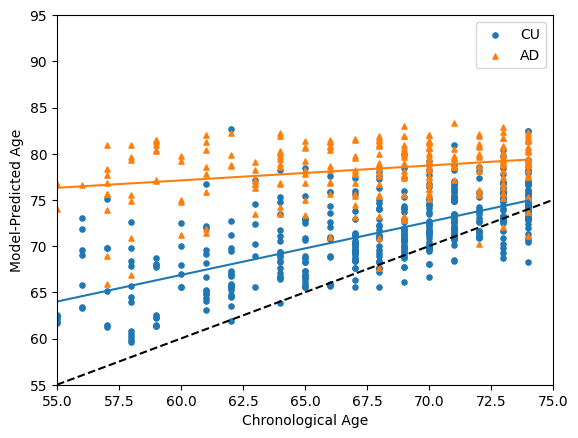

Slope for CU RF: 0.5748523223723905
Slope for AD RF: 0.16108693869602125
32.38343719055138
67.44860242293868
The BAD for RF is: 8.170415293423293
MAE for CU RF line of best fit: 2.57276340028685
MAE for AD RF line of best fit: 2.2802322878794463
Standard deviation for CU RF line of best fit: 3.2310031712975067
Standard deviation for AD RF line of best fit: 2.9866942029523287
ID value: 0.7797124246045569
IDV1: 0.9344404579322585
IDV2: 0.8849945890384503
IDV3: 0.8100691615381449
IDV4: 0.7042225042142253
IDV5: 0.5648354022626886


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from scipy.integrate import quad

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
######


top_age=75# changing this metric will increase the upper bound of the target region.


def line_of_best_fit(x, slope, intercept):
    return slope * x + intercept

def calculate_mae(y_true, y_pred, slope, intercept):
    best_fit_vals = line_of_best_fit(y_true, slope, intercept)
    return mean_absolute_error(y_pred, best_fit_vals)

def integrand(x, a, b, c, d):
    return (c * x + d) - (a * x + b)

def plot_scatter_with_fit(y_true_cn, y_pred_cn, y_true_ad, y_pred_ad, x_label, y_label, group_label):
    fig, ax = plt.subplots()
    ax.scatter(y_true_cn, y_pred_cn, marker='o', label='CU',s=14)
    ax.scatter(y_true_ad, y_pred_ad, marker='^', label='AD',s=14)
    ax.legend()
    ax.plot([55, top_age], [55, top_age], linestyle='--', color='black')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xlim(55, top_age)
    ax.set_ylim(55, 95)
    unique_y_true_cn = np.unique(y_true_cn)
    unique_y_true_ad = np.unique(y_true_ad)
    ax.plot(unique_y_true_cn, np.poly1d(np.polyfit(y_true_cn, y_pred_cn, 1))(unique_y_true_cn),  label='Line of Best Fit (CU)')
    ax.plot(unique_y_true_ad, np.poly1d(np.polyfit(y_true_ad, y_pred_ad, 1))(unique_y_true_ad),  label='Line of Best Fit (AD)')
    plt.show()
########################################################################################################
########################################################################################################
#Main Function below
#######################################################################################################
########################################################################################################


def process_data(y_true_cn, y_pred_cn, y_true_ad, y_pred_ad, group_label):
    plot_scatter_with_fit(y_true_cn, y_pred_cn, y_true_ad, y_pred_ad, 'Chronological Age', 'Model-Predicted Age', group_label)
    
    coefficients_cn = np.polyfit(y_true_cn, y_pred_cn, 1)
    slope_cn, y_int_cn = coefficients_cn
    coefficients_ad = np.polyfit(y_true_ad, y_pred_ad, 1)
    slope_ad, y_int_ad = coefficients_ad


    def calculate_std(y_true, y_pred, slope, intercept):
        # Calculate difference from expected values
        diff_from_LOBF = y_pred - (slope * y_true + intercept)
        # Calculate standard deviation of residuals
        std_dev = np.std(diff_from_LOBF)
        return std_dev



    def mu_function_cn(slope,t,cn_int):#this finds the center of the PDF and the LOBF equation
        return slope * t + cn_int
    def mu_function_ad(slope,t,ad_int):#this finds the center of the PDF and the LOBF equation
        return slope * t + ad_int
        

        # Define the normal PDFs where mu is a function of t
    def normal_pdf_cn(x, t, sigma,slope,int):
            mu = mu_function_cn(slope,t,int)
            return norm.pdf(x, mu, sigma)

    def normal_pdf_ad(x, t, sigma,slope,int):
        mu = mu_function_ad(slope,t,int)
        return norm.pdf(x, mu, sigma)
    

    def diff_at_point(x, t, cn_slope, ad_slope, cn_int, ad_int, cn_sigma, ad_sigma):
        pdf_difference = abs(normal_pdf_cn(x, t, cn_sigma, cn_slope, cn_int) - normal_pdf_ad(x, t, ad_sigma, ad_slope, ad_int))
        return pdf_difference
    
    def integrate_diff_over_t(t):
        a,b= quad(diff_at_point, -np.inf, np.inf, args=(t, slope_cn, slope_ad, y_int_cn, y_int_ad, cn_sigma, ad_sigma))
        return a
    

    print(f"Slope for CU {group_label}:", slope_cn)
    print(f"Slope for AD {group_label}:", slope_ad)
    print(y_int_cn)
    print(y_int_ad)

    diff_factor, _ = quad(integrand, 55, top_age, args=(slope_cn, y_int_cn, slope_ad, y_int_ad))
    print(f"The BAD for {group_label} is:", diff_factor/20)
    
    mae_cn = calculate_mae(y_true_cn, y_pred_cn, slope_cn, y_int_cn)
    mae_ad = calculate_mae(y_true_ad, y_pred_ad, slope_ad, y_int_ad)
    print(f"MAE for CU {group_label} line of best fit:", mae_cn)
    print(f"MAE for AD {group_label} line of best fit:", mae_ad)

    cn_sigma = calculate_std(y_true_cn, y_pred_cn, slope_cn, y_int_cn)
    ad_sigma = calculate_std(y_true_ad, y_pred_ad, slope_ad, y_int_ad)

    print(f"Standard deviation for CU {group_label} line of best fit:", cn_sigma)
    print(f"Standard deviation for AD {group_label} line of best fit:", ad_sigma)
    eq_cn = f'Normal PDF for CU: f(x) = (1 / (sqrt(2 * pi) * {cn_sigma})) * exp(-0.5 * ((x - (slope_cn * t + y_int_cn))**2 / {cn_sigma}**2))'
    eq_ad = f'Normal PDF for AD: f(x) = (1 / (sqrt(2 * pi) * {ad_sigma})) * exp(-0.5 * ((x - (slope_ad * t + y_int_ad))**2 / {ad_sigma}**2))'

    '''print("Normal PDF Equations:")
    print(eq_cn)
    print(eq_ad)
    print(slope_cn)
    print(y_int_cn)
'''
    integrated_difference1, error = quad(integrate_diff_over_t, 55, 59)

    integrated_difference2, error = quad(integrate_diff_over_t, 59, 63)
    integrated_difference3, error = quad(integrate_diff_over_t, 63, 67)
    integrated_difference4, error = quad(integrate_diff_over_t, 67, 71)
    integrated_difference5, error = quad(integrate_diff_over_t, 71,75)
    integrated_difference, error = quad(integrate_diff_over_t, 55, top_age)
    
    print("ID value:",(integrated_difference)/40)
    
    print("IDV1:",integrated_difference1/8)
    print("IDV2:",integrated_difference2/8)
    print("IDV3:",integrated_difference3/8)
    print("IDV4:",integrated_difference4/8)
    print("IDV5:",integrated_difference5/8)

#############################
############################
#Use process_data to evaluate any set of predictions as seen below
############################
###############################



process_data(smooth_rl_vals_CU[smooth_rl_vals_CU<top_age], RF_smooth_preds_CU[smooth_rl_vals_CU<top_age], y_ad, RF_smooth_preds_AD, 'RF')
process_data(smooth_rl_vals_CU[smooth_rl_vals_CU<top_age], XG_smooth_preds_CU[smooth_rl_vals_CU<top_age], y_ad, XG_smooth_preds_AD, 'XGboost')
process_data(smooth_rl_vals_CU[smooth_rl_vals_CU<top_age], LR_smooth_preds_CU[smooth_rl_vals_CU<top_age], y_ad, LR_smooth_preds_AD, 'LR')

